# Constructive Heuristics for the Vehicle Routing Problem
As described [here](https://allaboutalgorithms.com/constructive-heuristics-for-the-vehicle-routing-problem-3ffc5d713133).

(-0.022972159056386242,
 0.9496067861578744,
 -0.043928214335027485,
 0.9592446797784799)

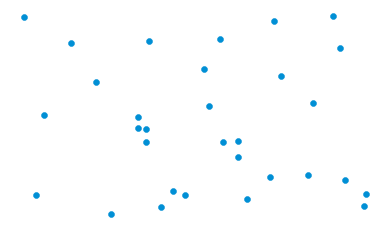

In [1]:
import random
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
random.seed(123)

cities = [(0.5, 0.5)] + [(random.random(), random.random()) for _ in range(30)]

plt.scatter(
    [city[0] for city in cities],
    [city[1] for city in cities],
)
plt.axis("off")

In [2]:
import math

distance_matrix = [
    [math.sqrt((start_city[0] - end_city[0]) ** 2 + (start_city[1] - end_city[1]) ** 2) for end_city in cities]
    for start_city in cities
]

In [3]:
def nearest_city(distance_matrix, depot, n_vehicles):
    unvisited_cities = set(range(len(distance_matrix))) - {depot}
    tours = [[depot] for vehicle in range(n_vehicles)]
    lengths = [0 for vehicle in range(n_vehicles)]

    while unvisited_cities:  # O(n)
        min_distance, closest_city, best_vehicle = min(
            (
                (distance_matrix[tours[vehicle][-1]][city], city, vehicle)
                for city in unvisited_cities
                for vehicle in range(n_vehicles)
            ),
            key=lambda x: x[0],
        )  # O(kn)
        tours[best_vehicle].append(closest_city)
        lengths[best_vehicle] += min_distance
        unvisited_cities.remove(closest_city)

    return [
        {"tour": tours[vehicle] + [depot], "length": lengths[vehicle] + distance_matrix[tours[vehicle][-1]][depot]}
        for vehicle in range(n_vehicles)
    ]

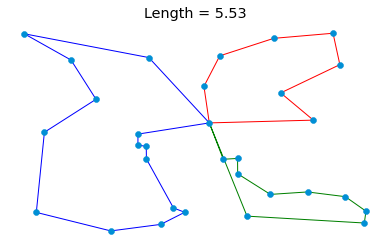

In [4]:
def plot(result, cities, colors="rgbcmyk"):
    plt.scatter(
        [city[0] for city in cities],
        [city[1] for city in cities],
    )

    total_length = 0
    for vehicle in range(len(result)):
        plt.plot(
            [cities[result[vehicle]["tour"][i]][0] for i in range(len(result[vehicle]["tour"]))],
            [cities[result[vehicle]["tour"][i]][1] for i in range(len(result[vehicle]["tour"]))],
            c=colors[vehicle],
            linewidth=1,
            zorder=-1,
        )
        total_length += result[vehicle]["length"]

    plt.title(f"Length = {total_length:.2f}")

    plt.axis("off")


result = nearest_city(distance_matrix, depot=0, n_vehicles=3)
plot(result, cities)

In [5]:
def greedy_insert(distance_matrix, depot, n_vehicles):
    unvisited_cities = set(range(len(distance_matrix))) - {depot}
    tours = [[depot, depot] for vehicle in range(n_vehicles)]
    lengths = [0 for vehicle in range(n_vehicles)]

    while unvisited_cities:  # O(n)
        best_length, best_city, best_vehicle, best_i = min(
            (
                (
                    lengths[vehicle]
                    - distance_matrix[tours[vehicle][i - 1]][tours[vehicle][i]]
                    + distance_matrix[tours[vehicle][i - 1]][city]
                    + distance_matrix[city][tours[vehicle][i]],
                    city,
                    vehicle,
                    i,
                )
                for city in unvisited_cities  # O(n)
                for vehicle in range(n_vehicles)  # O(k)
                for i in range(1, len(tours[vehicle]))  # O(n)
            ),
            key=lambda x: x[0],
        )
        tours[best_vehicle] = tours[best_vehicle][:best_i] + [best_city] + tours[best_vehicle][best_i:]
        lengths[best_vehicle] = best_length
        unvisited_cities.remove(best_city)

    return [{"tour": tours[vehicle], "length": lengths[vehicle]} for vehicle in range(n_vehicles)]

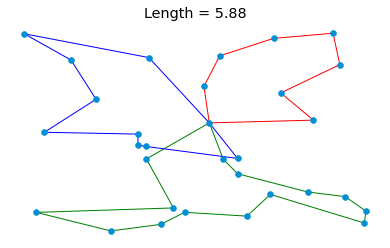

In [6]:
result = greedy_insert(distance_matrix, depot=0, n_vehicles=3)
plot(result, cities)